<a href="https://colab.research.google.com/github/NeSma237/Task_fashion_mnist-TensorFlow-Keras-/blob/main/Task_fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout , Flatten
from keras.datasets import fashion_mnist


In [ ]:
(X_train , y_train) , (X_test , y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print('the shape of training inputs: ' , X_train.shape)
print('the shape of training labels: ' , y_train.shape)
print('the shape of testing inputs: ' , X_test.shape)
print('the shape of testing labels: ' , y_test.shape)

the shape of training inputs:  (60000, 28, 28)
the shape of training labels:  (60000,)
the shape of testing inputs:  (10000, 28, 28)
the shape of testing labels:  (10000,)


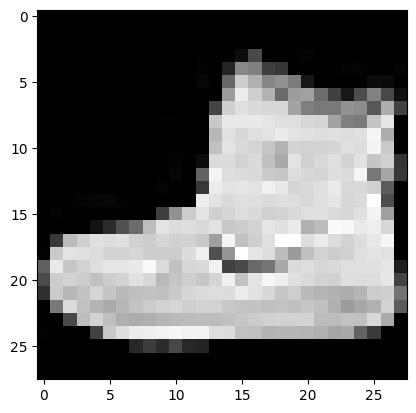

In [ ]:
plt.imshow(X_train[0] , cmap = 'gray')
plt.show()

In [ ]:
num_classes = len(np.unique(y_train))
print("Number of classes:", num_classes)

Number of classes: 10


In [ ]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(784, activation='relu'))
model.add(Dense(392, activation='relu'))
model.add(Dense(196, activation='relu'))
model.add(Dense(49, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 784)            │       615,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 392)            │       307,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 196)            │        77,028 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 49)             │         9,653 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           500 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,010,341 (3.85 MB)

 Trainable params: 1,010,341 (3.85 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy' , metrics=['accuracy'] )

In [ ]:
# training
history = model.fit(X_train , y_train , epochs=5 , batch_size=128 , validation_data=(X_test , y_test))

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.9426 - loss: 0.1536 - val_accuracy: 0.8886 - val_loss: 0.3866
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.9476 - loss: 0.1404 - val_accuracy: 0.8863 - val_loss: 0.4040
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.9509 - loss: 0.1304 - val_accuracy: 0.8940 - val_loss: 0.3791
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.9545 - loss: 0.1222 - val_accuracy: 0.8934 - val_loss: 0.3735
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - accuracy: 0.9539 - loss: 0.1206 - val_accuracy: 0.8927 - val_loss: 0.3839


In [ ]:
loss , accuracy = model.evaluate(X_test , y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8934 - loss: 0.3816


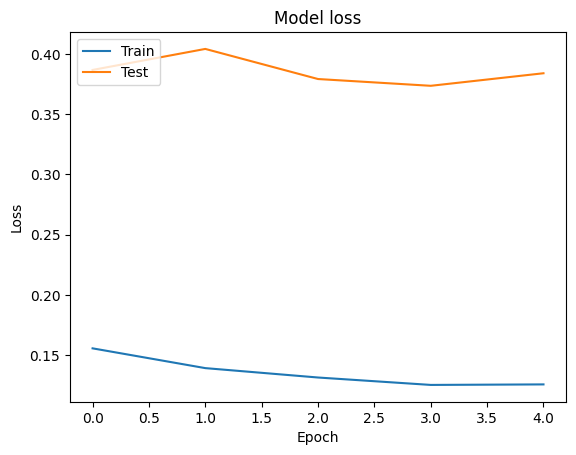

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
y_pred = model.predict(X_test)
y_pred[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


array([2.5631073e-06, 1.2383135e-05, 4.5366065e-08, 2.0658298e-07,
       7.5516176e-08, 9.9973746e-02, 6.0551436e-08, 9.1933921e-02,
       5.6500435e-03, 8.0242687e-01], dtype=float32)

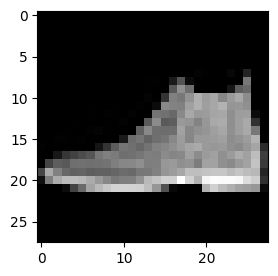

In [ ]:
plt.figure(figsize=(3,3))
plt.imshow(X_test[0] , cmap='gray')

In [ ]:
y_pred =np.argmax(y_pred[0])
print(y_pred)

9


In [ ]:
# training
history2 = model.fit(X_train , y_train , epochs=8 , batch_size=64 , validation_data=(X_test , y_test))

Epoch 1/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.8500 - loss: 0.4059 - val_accuracy: 0.8487 - val_loss: 0.4170
Epoch 2/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.8607 - loss: 0.3719 - val_accuracy: 0.8397 - val_loss: 0.4418
Epoch 3/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 22s 19ms/step - accuracy: 0.8727 - loss: 0.3460 - val_accuracy: 0.8446 - val_loss: 0.4186
Epoch 4/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.8764 - loss: 0.3318 - val_accuracy: 0.8496 - val_loss: 0.4165
Epoch 5/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.8825 - loss: 0.3215 - val_accuracy: 0.8714 - val_loss: 0.3561
Epoch 6/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - accuracy: 0.8858 - loss: 0.3051 - val_accuracy: 0.8715 - val_loss: 0.3576
Epoch 7/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 19ms/step - accuracy: 0.8880 - loss: 0.3011 - val_accuracy: 0.8772 - val_loss: 0.3448
Epoch 8/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.8905 - loss: 0.2963 - val_accu

In [ ]:
loss , accuracy = model.evaluate(X_test , y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8740 - loss: 0.3531


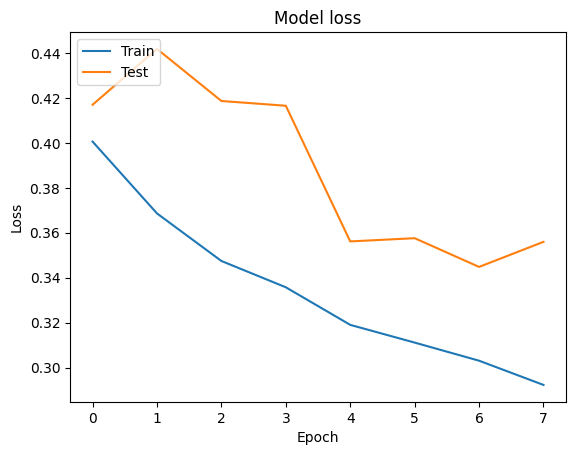

In [ ]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
y_pred = model.predict(X_test)
y_pred[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


array([6.1475112e-07, 9.3962058e-08, 3.7355816e-10, 1.6039874e-09,
       1.9675221e-10, 1.2779383e-04, 2.7757718e-11, 3.2269231e-03,
       4.1265689e-06, 9.9664044e-01], dtype=float32)

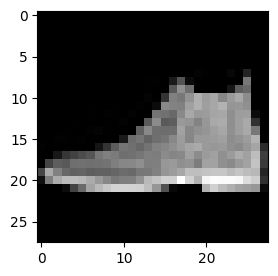

In [ ]:
plt.figure(figsize=(3,3))
plt.imshow(X_test[0] , cmap='gray')

In [ ]:
# training
history3 = model.fit(X_train , y_train , epochs=20 , batch_size=256 , validation_data=(X_test , y_test))

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.9366 - loss: 0.1695 - val_accuracy: 0.8885 - val_loss: 0.3454
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 37ms/step - accuracy: 0.9399 - loss: 0.1640 - val_accuracy: 0.8882 - val_loss: 0.3469
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - accuracy: 0.9404 - loss: 0.1606 - val_accuracy: 0.8884 - val_loss: 0.3535
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - accuracy: 0.9406 - loss: 0.1585 - val_accuracy: 0.8943 - val_loss: 0.3385
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - accuracy: 0.9420 - loss: 0.1542 - val_accuracy: 0.8873 - val_loss: 0.3549
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - accuracy: 0.9431 - loss: 0.1569 - val_accuracy: 0.8923 - val_loss: 0.3441
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 12s 45ms/step - accuracy: 0.9439 - loss: 0.1509 - val_accuracy: 0.8942 - val_loss: 0.3470
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9466 - loss: 0.1460 - val_ac

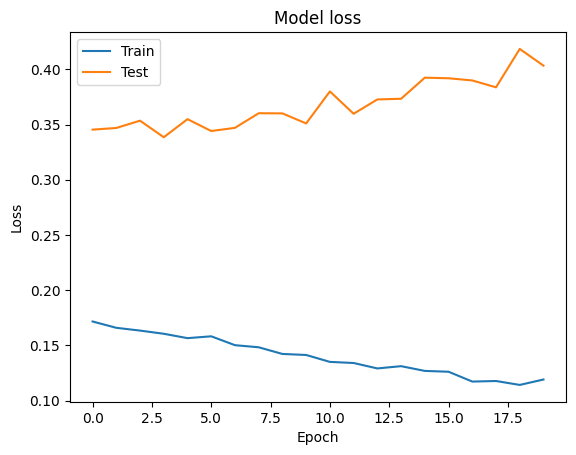

In [ ]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Conclusion

This notebook demonstrates the process of building and training a simple neural network to classify images from the Fashion MNIST dataset.

1.  **Data Loading and Exploration:** The Fashion MNIST dataset was loaded, and the shapes of the training and testing sets were examined. An example image was displayed to visualize the data.
2.  **Data Preprocessing:** The image data was normalized by scaling the pixel values to the range [0, 1].
3.  **Model Definition:** A sequential model with multiple dense layers and ReLU activation functions was defined, with a softmax output layer for classification.
4.  **Model Training:** The model was compiled with the Adam optimizer and sparse categorical crossentropy loss. The model was trained for different numbers of epochs and batch sizes, and the training history was plotted to observe the loss curves.
5.  **Evaluation and Prediction:** The trained model was evaluated on the test set to determine its accuracy. Predictions were made on a test image, and the predicted class was displayed.

The training process showed that the model learned to classify the Fashion MNIST images with reasonable accuracy. The loss plots indicated that the model was able to reduce the loss over epochs, although there was some gap between training and validation loss, suggesting potential overfitting. Further improvements could be explored by adding regularization techniques, adjusting the model architecture, or tuning hyperparameters.